# 2.5.1 Statistical Methods for Outlier Detection




Outliers are data points that deviate significantly from the majority of observations in a dataset. They can arise due to various reasons, such as measurement errors, data entry errors, or genuine variability in the data. Regardless of their cause, outliers can have a profound impact on statistical analyses and machine learning models. They can distort parameter estimates, skew distributions, and reduce the accuracy and robustness of predictive models.

Detecting and treating outliers is a crucial step in the data preprocessing pipeline. Effective outlier detection and treatment can enhance the quality of data, leading to more reliable and interpretable results. This section focuses on two commonly used statistical methods for outlier detection:

1. **Z-score Method**: The Z-score method is based on the standard score, which measures how many standard deviations a data point is from the mean of the dataset. Data points with a Z-score greater than a specified threshold (commonly 3 or -3) are considered outliers. This method assumes the data follows a normal distribution and is effective for datasets with this characteristic.

2. **Interquartile Range (IQR) Method**: The IQR method identifies outliers based on the spread of the middle 50% of the data. The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the dataset. Outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is particularly useful for datasets with skewed distributions, as it is less sensitive to extreme values than the Z-score method.

In this section, we will illustrate the detection of outliers using these two methods with synthetic data. We will generate a dataset with a mix of normally distributed data and deliberately introduced outliers. We will then apply the Z-score and IQR methods to identify and remove these outliers. Finally, we will visualize the data before and after outlier removal to understand the impact of these teng workflow.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Generate synthetic data
np.random.seed(42)
data = np.random.normal(0, 1, 1000)
outliers = np.random.normal(10, 1, 50)
data_with_outliers = np.concatenate([data, outliers])

In [3]:
# Convert data to a DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])

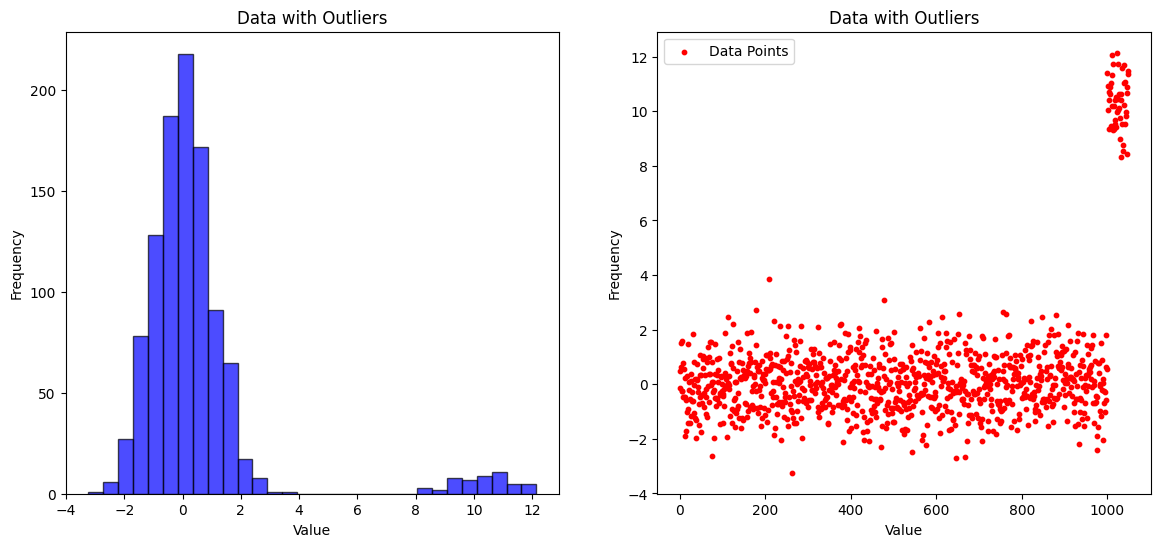

In [4]:
# Plot original data with outliers
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df['Value'], bins=30, alpha=0.7, color='b', edgecolor='black')
plt.title('Data with Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.scatter(df.index, df['Value'], color='r', s=10, label='Data Points')
plt.title('Data with Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 1. <u>Z-Score Method</u>

In [5]:
# Z-score method for outlier detection
z_scores = stats.zscore(df['Value'])
abs_z_scores = np.abs(z_scores)
outliers_z = df[abs_z_scores > 3]

In [6]:
# Removing outliers using Z-score method
df_no_outliers_z = df[abs_z_scores <= 3]

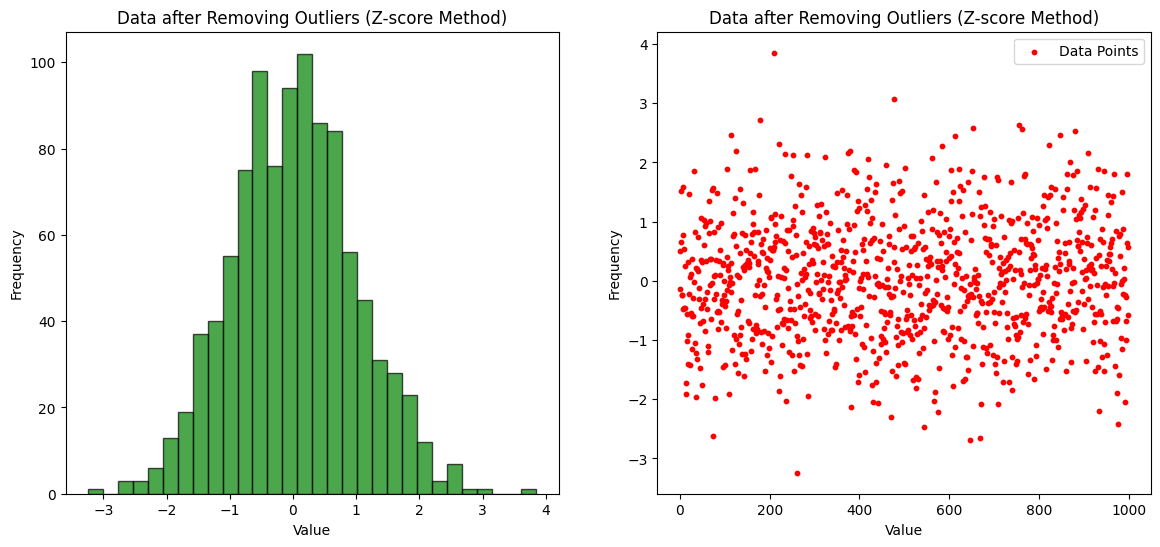

In [7]:
# Plot data after removing outliers using Z-score method
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.hist(df_no_outliers_z['Value'], bins=30, alpha=0.7, color='g', edgecolor='black')
plt.title('Data after Removing Outliers (Z-score Method)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.scatter(df_no_outliers_z.index, df_no_outliers_z['Value'], color='r', s=10, label='Data Points')
plt.title('Data after Removing Outliers (Z-score Method)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 2. <u>Inter-Quartile Range (IQR) Method</u>

In [8]:
# IQR method for outlier detection
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))]

In [9]:
# Removing outliers using IQR method
df_no_outliers_iqr = df[~df.index.isin(outliers_iqr.index)]

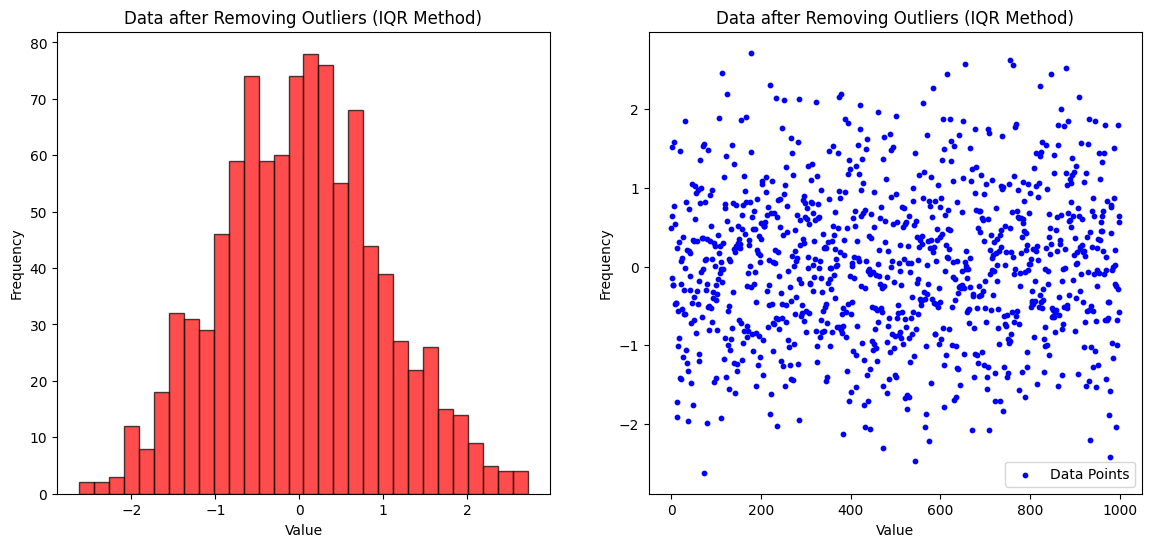

In [10]:
# Plot data after removing outliers using IQR method
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.hist(df_no_outliers_iqr['Value'], bins=30, alpha=0.7, color='r', edgecolor='black')
plt.title('Data after Removing Outliers (IQR Method)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.scatter(df_no_outliers_iqr.index, df_no_outliers_iqr['Value'], color='b', s=10, label='Data Points')
plt.title('Data after Removing Outliers (IQR Method)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
# Summary
print("Original Data: Mean = {:.2f}, Std Dev = {:.2f}".format(df['Value'].mean(), df['Value'].std()))
print("After Removing Outliers (Z-score): Mean = {:.2f}, Std Dev = {:.2f}".format(df_no_outliers_z['Value'].mean(), df_no_outliers_z['Value'].std()))
print("After Removing Outliers (IQR): Mean = {:.2f}, Std Dev = {:.2f}".format(df_no_outliers_iqr['Value'].mean(), df_no_outliers_iqr['Value'].std()))

Original Data: Mean = 0.51, Std Dev = 2.40
After Removing Outliers (Z-score): Mean = 0.02, Std Dev = 0.98
After Removing Outliers (IQR): Mean = 0.02, Std Dev = 0.96


## Conclusion

Detecting and treating outliers is an essential step in ensuring the quality of data for analysis and modeling. Outliers can significantly distort statistical measures and negatively impact the performance of machine learning models. By identifying and removing outliers, we can achieve more accurate and robust results.

In this section, we explored two statistical methods for outlier detection: the Z-score method and the Interquartile Range (IQR) meth
- od. The Z-score method is effective for normally distributed data, identifying outliers based on their deviation from the m
- an. The IQR method, on the other hand, is suitable for datasets with skewed distributions, detecting outliers based on the spread of the middle 50% of the data.

Through visualizations, we observed the impact of outlier removal on the data distribution. The histograms and scatter plots provided a clear before-and-after comparison, demonstrating how these methods effectively reduce the influence of extreme values.

Overall, incorporating outlier detection and treatment in your data preprocessing pipeline can lead to cleaner datasets and more reliable analytical outcomes. It is a crucial step for improving the performance and interpretability of your statistical analyses and machine learning models.
